In [1]:
# Cell 1: Install packages
!pip install torch torchvision torchaudio
!pip install librosa
!pip install scikit-learn
!pip install matplotlib seaborn
!pip install pandas numpy
!pip install kagglehub
!pip install tqdm
!pip install seaborn
!pip install kagglehub


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import sys
!{sys.executable} -m pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import sys
!{sys.executable} -m pip install kagglehub


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Cell 2: Import libraries with GPU check
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import seaborn as sns
import kagglehub

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

# Sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Check CUDA availability
print("="*70)
print("GPU CHECK")
print("="*70)
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
else:
    print("⚠ No CUDA available - running on CPU")
    print("To enable GPU:")
    print("  1. Make sure you have an NVIDIA GPU")
    print("  2. Install CUDA toolkit")
    print("  3. Reinstall PyTorch with CUDA support")

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n✓ Using device: {device}")
print("="*70 + "\n")

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ All libraries imported!")

c:\Users\muzam\mujica\Venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU CHECK
PyTorch version: 2.9.1+cu126
CUDA available: True
CUDA version: 12.6
Number of GPUs: 1
GPU name: NVIDIA GeForce RTX 4060 Laptop GPU
GPU memory: 8.00 GB

✓ Using device: cuda

✓ All libraries imported!


In [3]:
# Cell 3: Download GTZAN dataset
print("Downloading GTZAN dataset...")
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
print(f"✓ Dataset downloaded to: {path}")

# Find the CSV file
gtzan_features_path = os.path.join(path, 'Data', 'features_3_sec.csv')

# Load data
print("\nLoading features...")
df = pd.read_csv(gtzan_features_path)

print(f"✓ Loaded {len(df)} samples")
print(f"✓ Shape: {df.shape}")
print(f"\nGenre distribution:")
print(df['label'].value_counts())

✓ Dataset downloaded to: C:\Users\muzam\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1

Loading features...
✓ Loaded 9990 samples
✓ Shape: (9990, 60)

Genre distribution:
label
blues        1000
jazz         1000
pop          1000
reggae       1000
metal        1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64


In [4]:
# Cell 4: Prepare features and labels
# Drop filename column, keep features and label
df = df.drop('filename', axis=1)

# Separate features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nGenre encoding:")
for i, genre in enumerate(label_encoder.classes_):
    print(f"  {genre} → {i}")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n✓ Train set: {len(X_train)} samples")
print(f"✓ Test set: {len(X_test)} samples")

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Features normalized")

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test)

print(f"\n✓ Converted to PyTorch tensors")
print(f"  X_train shape: {X_train_tensor.shape}")
print(f"  y_train shape: {y_train_tensor.shape}")

Features shape: (9990, 58)
Labels shape: (9990,)

Genre encoding:
  blues → 0
  classical → 1
  country → 2
  disco → 3
  hiphop → 4
  jazz → 5
  metal → 6
  pop → 7
  reggae → 8
  rock → 9

✓ Train set: 7992 samples
✓ Test set: 1998 samples

✓ Features normalized

✓ Converted to PyTorch tensors
  X_train shape: torch.Size([7992, 58])
  y_train shape: torch.Size([7992])


In [10]:
# Cell 5: Create DataLoaders
batch_size = 32

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"✓ DataLoaders created")
print(f"  Train batches: {len(train_loader)}")
print(f"  Test batches: {len(test_loader)}")

✓ DataLoaders created
  Train batches: 250
  Test batches: 63


In [11]:
# Cell 6: Simple Dense Neural Network (like the Keras model)
class DenseNN(nn.Module):
    def __init__(self, input_dim, num_classes=10):
        super(DenseNN, self).__init__()
        
        self.model = nn.Sequential(
            # Layer 1
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            # Layer 2
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            # Layer 3
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            # Layer 4
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            # Output layer
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        return self.model(x)

# Test the model
input_dim = X_train_tensor.shape[1]
dense_model = DenseNN(input_dim=input_dim, num_classes=10).to(device)

print("✓ Dense Neural Network created")
print(f"\nModel architecture:")
print(dense_model)

# Count parameters
total_params = sum(p.numel() for p in dense_model.parameters())
print(f"\nTotal parameters: {total_params:,}")

✓ Dense Neural Network created

Model architecture:
DenseNN(
  (model): Sequential(
    (0): Linear(in_features=58, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=256, out_features=10, bias=True)
  )
)

Total parameters: 215,050


In [21]:
# Cell 7: Bidirectional LSTM Model
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, num_classes=10):
        super(BiLSTMModel, self).__init__()
        
        # Batch normalization for input
        self.input_bn = nn.BatchNorm1d(1)
        
        # First Bidirectional LSTM layer
        self.lstm1 = nn.LSTM(input_dim, 256, batch_first=True, bidirectional=True)
        self.bn1 = nn.BatchNorm1d(512)  # 256*2 for bidirectional
        self.dropout1 = nn.Dropout(0.3)
        
        # Second Bidirectional LSTM layer
        self.lstm2 = nn.LSTM(512, 128, batch_first=True, bidirectional=True)
        self.bn2 = nn.BatchNorm1d(256)  # 128*2 for bidirectional
        self.dropout2 = nn.Dropout(0.3)
        
        # Dense layers
        self.fc1 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.4)
        
        self.fc2 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.4)
        
        # Output layer
        self.fc3 = nn.Linear(64, num_classes)
        
        self.relu = nn.ReLU()
    
    def forward(self, x):
        # Reshape input: (batch, features) -> (batch, 1, features)
        x = x.unsqueeze(1)
        
        # Input batch norm
        x = self.input_bn(x)
        
        # First LSTM layer
        x, _ = self.lstm1(x)
        x = x.squeeze(1)  # Remove sequence dimension
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = x.unsqueeze(1)  # Add back for next LSTM
        
        # Second LSTM layer
        x, _ = self.lstm2(x)
        x = x[:, -1, :]  # Take last output
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        
        # Dense layers
        x = self.fc1(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout3(x)
        
        x = self.fc2(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout4(x)
        
        # Output
        x = self.fc3(x)
        
        return x

# Create model
lstm_model = BiLSTMModel(input_dim=input_dim, num_classes=10).to(device)

print("✓ BiLSTM Model created")
print(f"\nModel architecture:")
print(lstm_model)

total_params = sum(p.numel() for p in lstm_model.parameters())
print(f"\nTotal parameters: {total_params:,}")

✓ BiLSTM Model created

Model architecture:
BiLSTMModel(
  (input_bn): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm1): LSTM(58, 256, batch_first=True, bidirectional=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (lstm2): LSTM(512, 128, batch_first=True, bidirectional=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (re

In [15]:
# Cell 8: BiLSTM with Attention Mechanism
class AttentionLayer(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionLayer, self).__init__()
        self.attention = nn.Linear(hidden_dim, 1)
    
    def forward(self, lstm_output):
        # lstm_output shape: (batch, seq_len, hidden_dim)
        attention_weights = torch.softmax(self.attention(lstm_output), dim=1)
        # attention_weights shape: (batch, seq_len, 1)
        
        # Apply attention weights
        context = torch.sum(attention_weights * lstm_output, dim=1)
        # context shape: (batch, hidden_dim)
        
        return context, attention_weights

class BiLSTMAttentionModel(nn.Module):
    def __init__(self, input_dim, num_classes=10):
        super(BiLSTMAttentionModel, self).__init__()
        
        # Input batch normalization
        self.input_bn = nn.BatchNorm1d(1)
        
        # First Bidirectional LSTM with Attention
        self.lstm1 = nn.LSTM(input_dim, 256, batch_first=True, bidirectional=True)
        self.attention1 = AttentionLayer(512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.3)
        
        # Second Bidirectional LSTM with Attention
        self.lstm2 = nn.LSTM(512, 128, batch_first=True, bidirectional=True)
        self.attention2 = AttentionLayer(256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.3)
        
        # Third Bidirectional LSTM
        self.lstm3 = nn.LSTM(256, 64, batch_first=True, bidirectional=True)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.3)
        
        # Dense layers with L2 regularization (weight_decay in optimizer)
        self.fc1 = nn.Linear(128, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.4)
        
        self.fc2 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.4)
        
        # Output layer
        self.fc3 = nn.Linear(64, num_classes)
        
        self.relu = nn.ReLU()
    
    def forward(self, x):
        # Reshape: (batch, features) -> (batch, 1, features)
        x = x.unsqueeze(1)
        
        # Input normalization
        x = self.input_bn(x)
        
        # First LSTM with attention
        lstm1_out, _ = self.lstm1(x)
        attn1_out, _ = self.attention1(lstm1_out)
        x = self.bn1(attn1_out)
        x = self.relu(x)
        x = self.dropout1(x)
        x = x.unsqueeze(1)
        
        # Second LSTM with attention
        lstm2_out, _ = self.lstm2(x)
        attn2_out, _ = self.attention2(lstm2_out)
        x = self.bn2(attn2_out)
        x = self.relu(x)
        x = self.dropout2(x)
        x = x.unsqueeze(1)
        
        # Third LSTM (no attention)
        lstm3_out, _ = self.lstm3(x)
        x = lstm3_out[:, -1, :]  # Take last output
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout3(x)
        
        # Dense layers
        x = self.fc1(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout4(x)
        
        x = self.fc2(x)
        x = self.bn5(x)
        x = self.relu(x)
        x = self.dropout5(x)
        
        # Output
        x = self.fc3(x)
        
        return x

# Create model
attention_model = BiLSTMAttentionModel(input_dim=input_dim, num_classes=10).to(device)

print("✓ BiLSTM with Attention Model created")
print(f"\nModel architecture:")
print(attention_model)

total_params = sum(p.numel() for p in attention_model.parameters())
print(f"\nTotal parameters: {total_params:,}")

✓ BiLSTM with Attention Model created

Model architecture:
BiLSTMAttentionModel(
  (input_bn): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm1): LSTM(58, 256, batch_first=True, bidirectional=True)
  (attention1): AttentionLayer(
    (attention): Linear(in_features=512, out_features=1, bias=True)
  )
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (lstm2): LSTM(512, 128, batch_first=True, bidirectional=True)
  (attention2): AttentionLayer(
    (attention): Linear(in_features=256, out_features=1, bias=True)
  )
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (lstm3): LSTM(256, 64, batch_first=True, bidirectional=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_feature

In [16]:
# Cell 9: Training and evaluation functions
def train_epoch(model, dataloader, criterion, optimizer, device):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in tqdm(dataloader, desc='Training', leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    
    return epoch_loss, epoch_acc


def evaluate(model, dataloader, criterion, device):
    """Evaluate the model"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    
    return epoch_loss, epoch_acc, all_preds, all_labels

print("✓ Training functions defined")

✓ Training functions defined


In [24]:
# Cell 10: Train the model
# CHOOSE WHICH MODEL TO TRAIN:
# model = dense_model          # Simple Dense NN
# model = lstm_model           # BiLSTM
model = attention_model      # BiLSTM with Attention (BEST)

# Training parameters
num_epochs = 100
learning_rate = 0.001
weight_decay = 0.01  # L2 regularization

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.2, patience=5, min_lr=1e-6
)

# Early stopping
best_val_loss = float('inf')
patience = 10
patience_counter = 0

# Training history
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

print(f"Training {model.__class__.__name__} for {num_epochs} epochs...")
print(f"Device: {device}\n")

# Training loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 50)
    
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    
    # Validate
    val_loss, val_acc, _, _ = evaluate(model, test_loader, criterion, device)
    
    # Save history
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%\n")
    
    # Learning rate scheduler
    scheduler.step(val_loss)
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Save best model
        torch.save(model.state_dict(), 'best_model.pth')
        print("✓ Model saved!")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs")
            break

print("\n" + "="*50)
print("TRAINING COMPLETE!")
print("="*50)

Training BiLSTMAttentionModel for 100 epochs...
Device: cuda

Epoch 1/100
--------------------------------------------------


Train Loss: 1.7968 | Train Acc: 37.04%
Val Loss: 1.2902 | Val Acc: 57.91%

✓ Model saved!
Epoch 2/100
--------------------------------------------------


Train Loss: 1.3297 | Train Acc: 55.91%
Val Loss: 1.0256 | Val Acc: 70.67%

✓ Model saved!
Epoch 3/100
--------------------------------------------------


Train Loss: 1.1817 | Train Acc: 62.44%
Val Loss: 0.9148 | Val Acc: 71.77%

✓ Model saved!
Epoch 4/100
--------------------------------------------------


Train Loss: 1.1189 | Train Acc: 65.04%
Val Loss: 0.8779 | Val Acc: 73.37%

✓ Model saved!
Epoch 5/100
--------------------------------------------------


Train Loss: 1.0955 | Train Acc: 65.85%
Val Loss: 0.8246 | Val Acc: 75.63%

✓ Model saved!
Epoch 6/100
--------------------------------------------------


Train Loss: 1.0676 | Train Acc: 66.72%
Val Loss: 0.8604 | Val Acc: 73.12%

Epoch 7/100
--------------------------------------------------


Train Loss: 1.0401 | Train Acc: 68.42%
Val Loss: 0.8504 | Val Acc: 73.42%

Epoch 8/100
--------------------------------------------------


Train Loss: 1.0335 | Train Acc: 68.61%
Val Loss: 0.8027 | Val Acc: 75.18%

✓ Model saved!
Epoch 9/100
--------------------------------------------------


Train Loss: 1.0238 | Train Acc: 68.92%
Val Loss: 0.7586 | Val Acc: 77.58%

✓ Model saved!
Epoch 10/100
--------------------------------------------------


Train Loss: 0.9903 | Train Acc: 70.12%
Val Loss: 0.8282 | Val Acc: 72.57%

Epoch 11/100
--------------------------------------------------


Train Loss: 1.0111 | Train Acc: 69.27%
Val Loss: 0.7457 | Val Acc: 78.43%

✓ Model saved!
Epoch 12/100
--------------------------------------------------


Train Loss: 0.9910 | Train Acc: 69.87%
Val Loss: 0.7605 | Val Acc: 75.78%

Epoch 13/100
--------------------------------------------------


Train Loss: 0.9622 | Train Acc: 71.17%
Val Loss: 0.7604 | Val Acc: 78.38%

Epoch 14/100
--------------------------------------------------


Train Loss: 0.9673 | Train Acc: 71.46%
Val Loss: 0.7133 | Val Acc: 78.38%

✓ Model saved!
Epoch 15/100
--------------------------------------------------


Train Loss: 0.9676 | Train Acc: 71.40%
Val Loss: 0.7190 | Val Acc: 79.13%

Epoch 16/100
--------------------------------------------------


Train Loss: 0.9402 | Train Acc: 72.36%
Val Loss: 0.7573 | Val Acc: 76.63%

Epoch 17/100
--------------------------------------------------


Train Loss: 0.9595 | Train Acc: 71.87%
Val Loss: 0.7284 | Val Acc: 77.88%

Epoch 18/100
--------------------------------------------------


Train Loss: 0.9438 | Train Acc: 72.31%
Val Loss: 0.6994 | Val Acc: 79.18%

✓ Model saved!
Epoch 19/100
--------------------------------------------------


Train Loss: 0.9391 | Train Acc: 72.33%
Val Loss: 0.7149 | Val Acc: 78.68%

Epoch 20/100
--------------------------------------------------


Train Loss: 0.9228 | Train Acc: 72.51%
Val Loss: 0.6839 | Val Acc: 78.98%

✓ Model saved!
Epoch 21/100
--------------------------------------------------


Train Loss: 0.9326 | Train Acc: 72.84%
Val Loss: 0.6742 | Val Acc: 81.53%

✓ Model saved!
Epoch 22/100
--------------------------------------------------


Train Loss: 0.9235 | Train Acc: 72.65%
Val Loss: 0.6970 | Val Acc: 79.68%

Epoch 23/100
--------------------------------------------------


Train Loss: 0.9058 | Train Acc: 73.87%
Val Loss: 0.7464 | Val Acc: 77.38%

Epoch 24/100
--------------------------------------------------


Train Loss: 0.9108 | Train Acc: 73.44%
Val Loss: 0.6393 | Val Acc: 80.68%

✓ Model saved!
Epoch 25/100
--------------------------------------------------


Train Loss: 0.9060 | Train Acc: 74.15%
Val Loss: 0.6855 | Val Acc: 79.68%

Epoch 26/100
--------------------------------------------------


Train Loss: 0.9019 | Train Acc: 73.82%
Val Loss: 0.6649 | Val Acc: 80.43%

Epoch 27/100
--------------------------------------------------


Train Loss: 0.9000 | Train Acc: 73.65%
Val Loss: 0.6870 | Val Acc: 78.93%

Epoch 28/100
--------------------------------------------------


Train Loss: 0.9015 | Train Acc: 73.67%
Val Loss: 0.6687 | Val Acc: 80.28%

Epoch 29/100
--------------------------------------------------


Train Loss: 0.8972 | Train Acc: 74.01%
Val Loss: 0.6650 | Val Acc: 79.88%

Epoch 30/100
--------------------------------------------------


Train Loss: 0.8766 | Train Acc: 74.31%
Val Loss: 0.6381 | Val Acc: 81.48%

✓ Model saved!
Epoch 31/100
--------------------------------------------------


Train Loss: 0.9010 | Train Acc: 74.59%
Val Loss: 0.6824 | Val Acc: 80.33%

Epoch 32/100
--------------------------------------------------


Train Loss: 0.8831 | Train Acc: 74.91%
Val Loss: 0.6627 | Val Acc: 80.48%

Epoch 33/100
--------------------------------------------------


Train Loss: 0.8847 | Train Acc: 74.36%
Val Loss: 0.6755 | Val Acc: 80.48%

Epoch 34/100
--------------------------------------------------


Train Loss: 0.8854 | Train Acc: 74.00%
Val Loss: 0.6742 | Val Acc: 80.53%

Epoch 35/100
--------------------------------------------------


Train Loss: 0.8886 | Train Acc: 73.96%
Val Loss: 0.6613 | Val Acc: 80.78%

Epoch 36/100
--------------------------------------------------


Train Loss: 0.8724 | Train Acc: 74.92%
Val Loss: 0.6446 | Val Acc: 80.13%

Epoch 37/100
--------------------------------------------------


Train Loss: 0.7648 | Train Acc: 78.05%
Val Loss: 0.5278 | Val Acc: 84.88%

✓ Model saved!
Epoch 38/100
--------------------------------------------------


Train Loss: 0.7156 | Train Acc: 80.21%
Val Loss: 0.5220 | Val Acc: 84.88%

✓ Model saved!
Epoch 39/100
--------------------------------------------------


Train Loss: 0.6880 | Train Acc: 81.23%
Val Loss: 0.4898 | Val Acc: 85.79%

✓ Model saved!
Epoch 40/100
--------------------------------------------------


Train Loss: 0.6569 | Train Acc: 82.56%
Val Loss: 0.4860 | Val Acc: 86.04%

✓ Model saved!
Epoch 41/100
--------------------------------------------------


Train Loss: 0.6239 | Train Acc: 83.45%
Val Loss: 0.4701 | Val Acc: 86.49%

✓ Model saved!
Epoch 42/100
--------------------------------------------------


Train Loss: 0.6298 | Train Acc: 83.12%
Val Loss: 0.4620 | Val Acc: 86.44%

✓ Model saved!
Epoch 43/100
--------------------------------------------------


Train Loss: 0.6145 | Train Acc: 83.48%
Val Loss: 0.4505 | Val Acc: 86.79%

✓ Model saved!
Epoch 44/100
--------------------------------------------------


Train Loss: 0.5864 | Train Acc: 83.86%
Val Loss: 0.4378 | Val Acc: 87.64%

✓ Model saved!
Epoch 45/100
--------------------------------------------------


Train Loss: 0.6022 | Train Acc: 83.97%
Val Loss: 0.4531 | Val Acc: 87.79%

Epoch 46/100
--------------------------------------------------


Train Loss: 0.5849 | Train Acc: 84.33%
Val Loss: 0.4307 | Val Acc: 87.54%

✓ Model saved!
Epoch 47/100
--------------------------------------------------


Train Loss: 0.5803 | Train Acc: 84.35%
Val Loss: 0.4275 | Val Acc: 87.69%

✓ Model saved!
Epoch 48/100
--------------------------------------------------


Train Loss: 0.5642 | Train Acc: 84.86%
Val Loss: 0.4306 | Val Acc: 87.74%

Epoch 49/100
--------------------------------------------------


Train Loss: 0.5684 | Train Acc: 84.81%
Val Loss: 0.4349 | Val Acc: 87.94%

Epoch 50/100
--------------------------------------------------


Train Loss: 0.5475 | Train Acc: 85.17%
Val Loss: 0.4225 | Val Acc: 87.74%

✓ Model saved!
Epoch 51/100
--------------------------------------------------


Train Loss: 0.5452 | Train Acc: 85.79%
Val Loss: 0.4216 | Val Acc: 87.24%

✓ Model saved!
Epoch 52/100
--------------------------------------------------


Train Loss: 0.5532 | Train Acc: 85.57%
Val Loss: 0.4008 | Val Acc: 88.49%

✓ Model saved!
Epoch 53/100
--------------------------------------------------


Train Loss: 0.5519 | Train Acc: 85.75%
Val Loss: 0.4197 | Val Acc: 88.04%

Epoch 54/100
--------------------------------------------------


Train Loss: 0.5580 | Train Acc: 85.12%
Val Loss: 0.4025 | Val Acc: 88.69%

Epoch 55/100
--------------------------------------------------


Train Loss: 0.5316 | Train Acc: 86.17%
Val Loss: 0.4001 | Val Acc: 88.49%

✓ Model saved!
Epoch 56/100
--------------------------------------------------


Train Loss: 0.5355 | Train Acc: 85.67%
Val Loss: 0.4015 | Val Acc: 88.74%

Epoch 57/100
--------------------------------------------------


Train Loss: 0.5149 | Train Acc: 86.61%
Val Loss: 0.4152 | Val Acc: 88.44%

Epoch 58/100
--------------------------------------------------


Train Loss: 0.5176 | Train Acc: 86.57%
Val Loss: 0.3932 | Val Acc: 89.09%

✓ Model saved!
Epoch 59/100
--------------------------------------------------


Train Loss: 0.5019 | Train Acc: 87.01%
Val Loss: 0.3863 | Val Acc: 89.34%

✓ Model saved!
Epoch 60/100
--------------------------------------------------


Train Loss: 0.5029 | Train Acc: 86.90%
Val Loss: 0.3848 | Val Acc: 89.69%

✓ Model saved!
Epoch 61/100
--------------------------------------------------


Train Loss: 0.5130 | Train Acc: 86.61%
Val Loss: 0.3949 | Val Acc: 89.14%

Epoch 62/100
--------------------------------------------------


Train Loss: 0.4903 | Train Acc: 87.36%
Val Loss: 0.4026 | Val Acc: 88.94%

Epoch 63/100
--------------------------------------------------


Train Loss: 0.5094 | Train Acc: 86.36%
Val Loss: 0.3718 | Val Acc: 89.09%

✓ Model saved!
Epoch 64/100
--------------------------------------------------


Train Loss: 0.4854 | Train Acc: 87.14%
Val Loss: 0.3852 | Val Acc: 88.99%

Epoch 65/100
--------------------------------------------------


Train Loss: 0.5007 | Train Acc: 86.86%
Val Loss: 0.3808 | Val Acc: 89.34%

Epoch 66/100
--------------------------------------------------


Train Loss: 0.4735 | Train Acc: 87.71%
Val Loss: 0.3985 | Val Acc: 88.54%

Epoch 67/100
--------------------------------------------------


Train Loss: 0.5085 | Train Acc: 87.06%
Val Loss: 0.3766 | Val Acc: 89.44%

Epoch 68/100
--------------------------------------------------


Train Loss: 0.4680 | Train Acc: 88.13%
Val Loss: 0.3616 | Val Acc: 89.94%

✓ Model saved!
Epoch 69/100
--------------------------------------------------


Train Loss: 0.4693 | Train Acc: 88.06%
Val Loss: 0.3762 | Val Acc: 89.14%

Epoch 70/100
--------------------------------------------------


Train Loss: 0.4687 | Train Acc: 88.00%
Val Loss: 0.3829 | Val Acc: 89.34%

Epoch 71/100
--------------------------------------------------


Train Loss: 0.4694 | Train Acc: 87.68%
Val Loss: 0.3622 | Val Acc: 89.79%

Epoch 72/100
--------------------------------------------------


Train Loss: 0.4705 | Train Acc: 87.85%
Val Loss: 0.3825 | Val Acc: 89.44%

Epoch 73/100
--------------------------------------------------


Train Loss: 0.4756 | Train Acc: 87.58%
Val Loss: 0.3621 | Val Acc: 89.94%

Epoch 74/100
--------------------------------------------------


Train Loss: 0.4815 | Train Acc: 87.49%
Val Loss: 0.3518 | Val Acc: 90.19%

✓ Model saved!
Epoch 75/100
--------------------------------------------------


Train Loss: 0.4853 | Train Acc: 87.63%
Val Loss: 0.3505 | Val Acc: 90.44%

✓ Model saved!
Epoch 76/100
--------------------------------------------------


Train Loss: 0.4474 | Train Acc: 88.55%
Val Loss: 0.3728 | Val Acc: 89.94%

Epoch 77/100
--------------------------------------------------


Train Loss: 0.4488 | Train Acc: 88.38%
Val Loss: 0.3874 | Val Acc: 89.34%

Epoch 78/100
--------------------------------------------------


Train Loss: 0.4508 | Train Acc: 88.55%
Val Loss: 0.3753 | Val Acc: 89.84%

Epoch 79/100
--------------------------------------------------


Train Loss: 0.4528 | Train Acc: 88.50%
Val Loss: 0.3553 | Val Acc: 89.89%

Epoch 80/100
--------------------------------------------------


Train Loss: 0.4437 | Train Acc: 88.83%
Val Loss: 0.3631 | Val Acc: 89.84%

Epoch 81/100
--------------------------------------------------


Train Loss: 0.4393 | Train Acc: 89.13%
Val Loss: 0.3530 | Val Acc: 90.14%

Epoch 82/100
--------------------------------------------------


Train Loss: 0.4306 | Train Acc: 89.08%
Val Loss: 0.3307 | Val Acc: 91.24%

✓ Model saved!
Epoch 83/100
--------------------------------------------------


Train Loss: 0.4009 | Train Acc: 90.03%
Val Loss: 0.3259 | Val Acc: 91.09%

✓ Model saved!
Epoch 84/100
--------------------------------------------------


Train Loss: 0.3973 | Train Acc: 89.96%
Val Loss: 0.3338 | Val Acc: 91.09%

Epoch 85/100
--------------------------------------------------


Train Loss: 0.3824 | Train Acc: 90.45%
Val Loss: 0.3401 | Val Acc: 91.04%

Epoch 86/100
--------------------------------------------------


Train Loss: 0.3814 | Train Acc: 90.64%
Val Loss: 0.3355 | Val Acc: 90.74%

Epoch 87/100
--------------------------------------------------


Train Loss: 0.3735 | Train Acc: 90.80%
Val Loss: 0.3291 | Val Acc: 90.84%

Epoch 88/100
--------------------------------------------------


Train Loss: 0.3781 | Train Acc: 90.83%
Val Loss: 0.3225 | Val Acc: 91.49%

✓ Model saved!
Epoch 89/100
--------------------------------------------------


Train Loss: 0.3746 | Train Acc: 90.97%
Val Loss: 0.3155 | Val Acc: 91.34%

✓ Model saved!
Epoch 90/100
--------------------------------------------------


Train Loss: 0.3583 | Train Acc: 91.67%
Val Loss: 0.3137 | Val Acc: 91.24%

✓ Model saved!
Epoch 91/100
--------------------------------------------------


Train Loss: 0.3642 | Train Acc: 91.04%
Val Loss: 0.3225 | Val Acc: 91.24%

Epoch 92/100
--------------------------------------------------


Train Loss: 0.3664 | Train Acc: 91.27%
Val Loss: 0.3125 | Val Acc: 91.64%

✓ Model saved!
Epoch 93/100
--------------------------------------------------


Train Loss: 0.3638 | Train Acc: 91.32%
Val Loss: 0.3091 | Val Acc: 91.79%

✓ Model saved!
Epoch 94/100
--------------------------------------------------


Train Loss: 0.3466 | Train Acc: 91.93%
Val Loss: 0.3076 | Val Acc: 91.54%

✓ Model saved!
Epoch 95/100
--------------------------------------------------


Train Loss: 0.3550 | Train Acc: 91.63%
Val Loss: 0.3119 | Val Acc: 91.69%

Epoch 96/100
--------------------------------------------------


Train Loss: 0.3548 | Train Acc: 91.59%
Val Loss: 0.3199 | Val Acc: 91.54%

Epoch 97/100
--------------------------------------------------


Train Loss: 0.3392 | Train Acc: 91.94%
Val Loss: 0.3125 | Val Acc: 91.74%

Epoch 98/100
--------------------------------------------------


Train Loss: 0.3664 | Train Acc: 91.22%
Val Loss: 0.3045 | Val Acc: 91.99%

✓ Model saved!
Epoch 99/100
--------------------------------------------------


Train Loss: 0.3452 | Train Acc: 91.72%
Val Loss: 0.3061 | Val Acc: 92.14%

Epoch 100/100
--------------------------------------------------


Train Loss: 0.3259 | Train Acc: 92.35%
Val Loss: 0.3041 | Val Acc: 92.04%

✓ Model saved!

TRAINING COMPLETE!


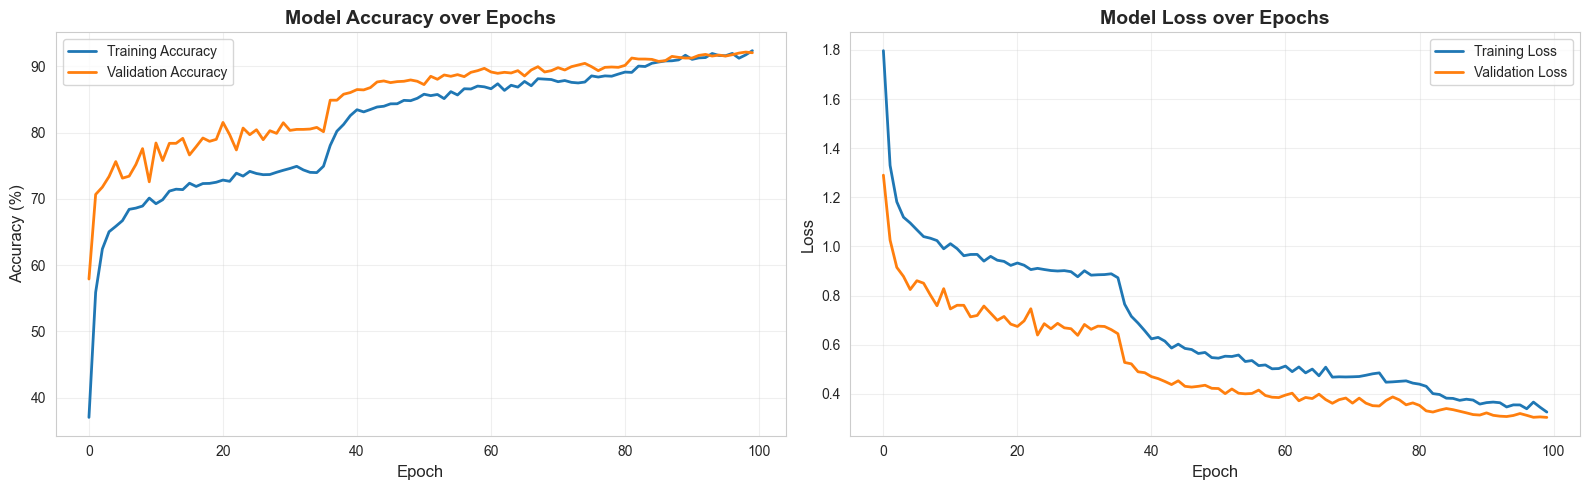

In [25]:
# Cell 11: Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Accuracy plot
ax1.plot(history['train_acc'], label='Training Accuracy', linewidth=2)
ax1.plot(history['val_acc'], label='Validation Accuracy', linewidth=2)
ax1.set_title('Model Accuracy over Epochs', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history['train_loss'], label='Training Loss', linewidth=2)
ax2.plot(history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('Model Loss over Epochs', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300)
plt.show()

In [26]:
# Cell 12: Load best model and evaluate
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Evaluate on test set
test_loss, test_acc, y_pred, y_true = evaluate(model, test_loader, criterion, device)

print("="*60)
print("FINAL TEST RESULTS")
print("="*60)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Detailed metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print("\nDetailed Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

FINAL TEST RESULTS
Test Loss: 0.3041
Test Accuracy: 92.04%

Classification Report:
              precision    recall  f1-score   support

       blues       0.93      0.93      0.93       200
   classical       0.94      0.94      0.94       199
     country       0.86      0.91      0.89       199
       disco       0.91      0.89      0.90       200
      hiphop       0.93      0.92      0.92       200
        jazz       0.92      0.93      0.93       200
       metal       0.95      0.94      0.95       200
         pop       0.93      0.88      0.90       200
      reggae       0.90      0.94      0.92       200
        rock       0.93      0.92      0.93       200

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998


Detailed Metrics:
Accuracy: 0.9204
Precision: 0.9210
Recall: 0.9204
F1 Score: 0.9205


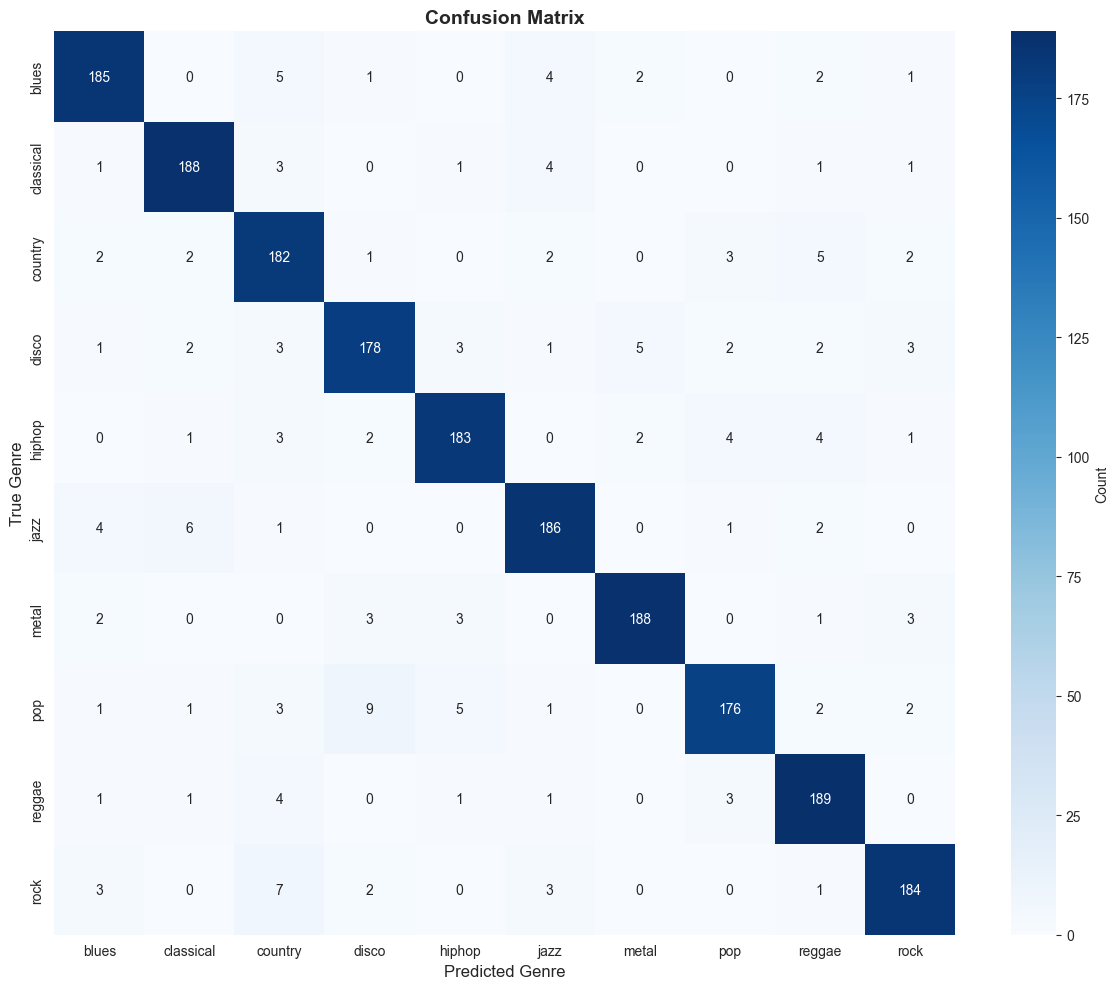

In [27]:
# Cell 13: Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Genre', fontsize=12)
plt.ylabel('True Genre', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

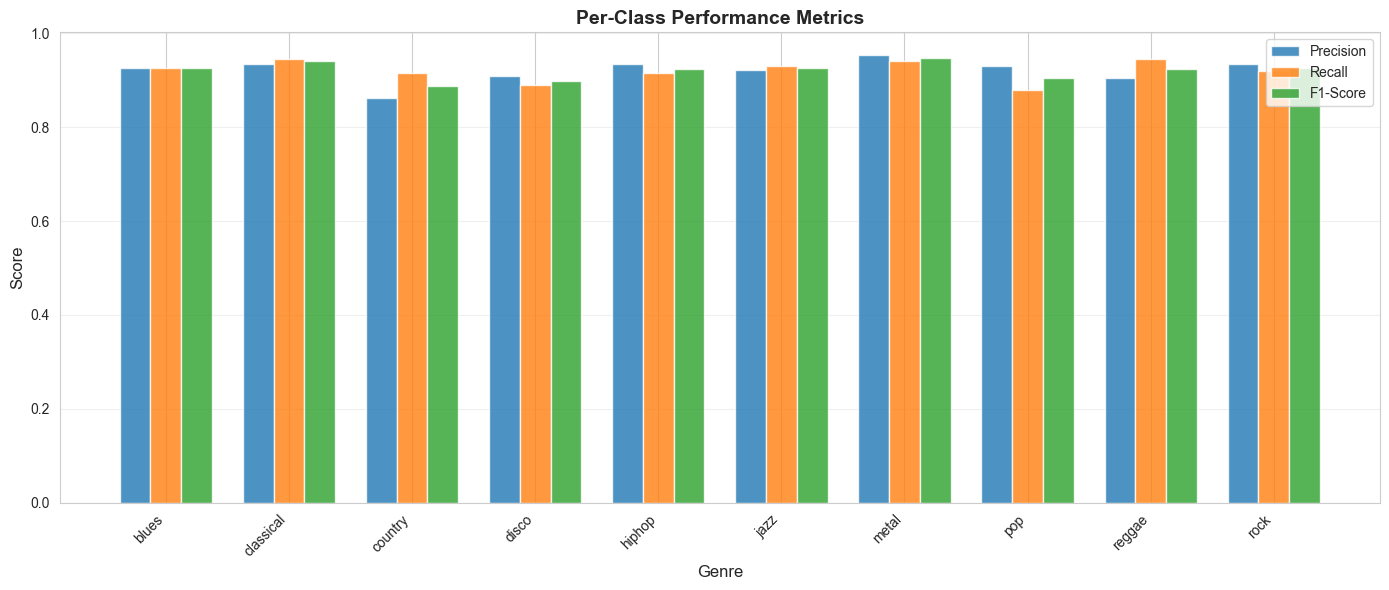

In [28]:
# Cell 14: Plot per-class performance
precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(
    y_true, y_pred
)

plt.figure(figsize=(14, 6))
x = np.arange(len(label_encoder.classes_))
width = 0.25

plt.bar(x - width, precision_per_class, width, label='Precision', alpha=0.8)
plt.bar(x, recall_per_class, width, label='Recall', alpha=0.8)
plt.bar(x + width, f1_per_class, width, label='F1-Score', alpha=0.8)

plt.xlabel('Genre', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Per-Class Performance Metrics', fontsize=14, fontweight='bold')
plt.xticks(x, label_encoder.classes_, rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('per_class_performance.png', dpi=300)
plt.show()

In [29]:
# Cell 15: Show sample predictions
print("="*70)
print("SAMPLE PREDICTIONS")
print("="*70)

# Get first 15 test samples
model.eval()
with torch.no_grad():
    sample_inputs = X_test_tensor[:15].to(device)
    sample_labels = y_test_tensor[:15].cpu().numpy()
    
    outputs = model(sample_inputs)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()

# Show predictions
for i in range(15):
    true_genre = label_encoder.inverse_transform([sample_labels[i]])[0]
    pred_genre = label_encoder.inverse_transform([predicted[i]])[0]
    
    status = "✓" if sample_labels[i] == predicted[i] else "✗"
    print(f"{status} True: {true_genre:10s} | Predicted: {pred_genre:10s}")

SAMPLE PREDICTIONS
✓ True: country    | Predicted: country   
✓ True: blues      | Predicted: blues     
✓ True: classical  | Predicted: classical 
✓ True: country    | Predicted: country   
✓ True: reggae     | Predicted: reggae    
✓ True: jazz       | Predicted: jazz      
✓ True: disco      | Predicted: disco     
✓ True: pop        | Predicted: pop       
✓ True: reggae     | Predicted: reggae    
✓ True: jazz       | Predicted: jazz      
✓ True: pop        | Predicted: pop       
✓ True: classical  | Predicted: classical 
✓ True: reggae     | Predicted: reggae    
✓ True: pop        | Predicted: pop       
✓ True: classical  | Predicted: classical 


In [ ]:
# Cell 16: Save everything for later use
import pickle

print("Saving model package...")

model_package = {
    'model_state_dict': model.state_dict(),
    'model_class': model.__class__.__name__,
    'input_dim': input_dim,
    'num_classes': 10,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'feature_columns': df.drop('label', axis=1).columns.tolist(),
    'test_accuracy': test_acc,
    'history': history
}

# Save with pickle
with open('pytorch_genre_classifier.pkl', 'wb') as f:
    pickle.dump(model_package, f)

# Also save just the model weights
torch.save(model.state_dict(), 'model_weights.pth')

print("✓ Model package saved to 'pytorch_genre_classifier.pkl'")
print("✓ Model weights saved to 'model_weights.pth'")

print("\n" + "="*70)
print("ALL DONE!")
print("="*70)
print(f"\nFinal Test Accuracy: {test_acc:.2f}%")
print(f"Model: {model.__class__.__name__}")
print(f"Total Parameters: {total_params:,}")

: 

In [5]:
# Cell 17: Hyperparameter Search Configuration
import itertools
import random
import time
import json
from datetime import datetime

print("="*70)
print("HYPERPARAMETER TUNING SETUP")
print("="*70)

# Define the search space (Conservative Grid - Option A)
hyperparameter_grid = {
    'learning_rate': [0.0005, 0.001, 0.002],
    'batch_size': [32, 64],
    'dropout_lstm': [0.25, 0.3, 0.35],
    'dropout_fc': [0.35, 0.4, 0.45],
    'lstm1_hidden_dim': [256, 384],
    'weight_decay': [0.01, 0.05],
}

# Fixed hyperparameters (not tuned)
fixed_params = {
    'lstm2_hidden_dim': 128,  # Derived: lstm1 // 2
    'lstm3_hidden_dim': 64,   # Derived: lstm2 // 2
    'fc1_hidden_dim': 128,
    'fc2_hidden_dim': 64,
    'num_lstm_layers': 3,
    'use_attention': True,
    'bidirectional': True,
    'optimizer': 'Adam',
    'max_epochs': 100,
    'early_stop_patience': 10,
    'scheduler_patience': 5,
    'scheduler_factor': 0.5,
}

# Calculate total possible combinations
total_combinations = 1
for param, values in hyperparameter_grid.items():
    total_combinations *= len(values)

print(f"\n✓ Search space defined")
print(f"  Tunable parameters: {len(hyperparameter_grid)}")
print(f"  Total combinations: {total_combinations:,}")

# How many random trials to run
NUM_TRIALS = 20  # Run 20 random combinations
print(f"  Trials to run: {NUM_TRIALS}")

# Generate random combinations
random.seed(42)  # For reproducibility
all_combinations = list(itertools.product(*hyperparameter_grid.values()))
random.shuffle(all_combinations)
selected_combinations = all_combinations[:NUM_TRIALS]

# Create trial configurations
trials = []
for i, combo in enumerate(selected_combinations):
    config = dict(zip(hyperparameter_grid.keys(), combo))
    # Add derived parameters
    config['lstm2_hidden_dim'] = config['lstm1_hidden_dim'] // 2
    config['lstm3_hidden_dim'] = config['lstm2_hidden_dim'] // 2
    # Merge with fixed params
    config.update(fixed_params)
    config['trial_id'] = i + 1
    trials.append(config)

print(f"\n✓ Generated {len(trials)} trial configurations")
print(f"\nFirst 3 trials:")
for i, trial in enumerate(trials[:3], 1):
    print(f"  Trial {i}: LR={trial['learning_rate']}, BS={trial['batch_size']}, "
          f"D_LSTM={trial['dropout_lstm']}, D_FC={trial['dropout_fc']}")

print("\n" + "="*70)

HYPERPARAMETER TUNING SETUP

✓ Search space defined
  Tunable parameters: 6
  Total combinations: 216
  Trials to run: 20

✓ Generated 20 trial configurations

First 3 trials:
  Trial 1: LR=0.0005, BS=64, D_LSTM=0.25, D_FC=0.35
  Trial 2: LR=0.002, BS=32, D_LSTM=0.25, D_FC=0.35
  Trial 3: LR=0.0005, BS=32, D_LSTM=0.35, D_FC=0.4



In [12]:
# Cell 18: Flexible BiLSTM Model with Configurable Hyperparameters

class ConfigurableBiLSTMAttentionModel(nn.Module):
    def __init__(self, config, input_dim=58, num_classes=10):
        super(ConfigurableBiLSTMAttentionModel, self).__init__()
        
        self.config = config
        self.input_bn = nn.BatchNorm1d(1)
        
        # Layer 1
        self.lstm1 = nn.LSTM(
            input_dim, 
            config['lstm1_hidden_dim'], 
            batch_first=True, 
            bidirectional=config['bidirectional']
        )
        hidden1_output = config['lstm1_hidden_dim'] * (2 if config['bidirectional'] else 1)
        
        if config['use_attention']:
            self.attention1 = AttentionLayer(hidden1_output)
        self.bn1 = nn.BatchNorm1d(hidden1_output)
        self.dropout1 = nn.Dropout(config['dropout_lstm'])
        
        # Layer 2
        self.lstm2 = nn.LSTM(
            hidden1_output, 
            config['lstm2_hidden_dim'], 
            batch_first=True, 
            bidirectional=config['bidirectional']
        )
        hidden2_output = config['lstm2_hidden_dim'] * (2 if config['bidirectional'] else 1)
        
        if config['use_attention']:
            self.attention2 = AttentionLayer(hidden2_output)
        self.bn2 = nn.BatchNorm1d(hidden2_output)
        self.dropout2 = nn.Dropout(config['dropout_lstm'])
        
        # Layer 3
        self.lstm3 = nn.LSTM(
            hidden2_output, 
            config['lstm3_hidden_dim'], 
            batch_first=True, 
            bidirectional=config['bidirectional']
        )
        hidden3_output = config['lstm3_hidden_dim'] * (2 if config['bidirectional'] else 1)
        self.bn3 = nn.BatchNorm1d(hidden3_output)
        self.dropout3 = nn.Dropout(config['dropout_lstm'])
        
        # Dense layers
        self.fc1 = nn.Linear(hidden3_output, config['fc1_hidden_dim'])
        self.bn4 = nn.BatchNorm1d(config['fc1_hidden_dim'])
        self.dropout4 = nn.Dropout(config['dropout_fc'])
        
        self.fc2 = nn.Linear(config['fc1_hidden_dim'], config['fc2_hidden_dim'])
        self.bn5 = nn.BatchNorm1d(config['fc2_hidden_dim'])
        self.dropout5 = nn.Dropout(config['dropout_fc'])
        
        self.fc3 = nn.Linear(config['fc2_hidden_dim'], num_classes)
        
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.input_bn(x)
        
        # LSTM 1
        lstm1_out, _ = self.lstm1(x)
        if self.config['use_attention']:
            attn1_out, _ = self.attention1(lstm1_out)
            x = attn1_out
        else:
            x = lstm1_out[:, -1, :]
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = x.unsqueeze(1)
        
        # LSTM 2
        lstm2_out, _ = self.lstm2(x)
        if self.config['use_attention']:
            attn2_out, _ = self.attention2(lstm2_out)
            x = attn2_out
        else:
            x = lstm2_out[:, -1, :]
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = x.unsqueeze(1)
        
        # LSTM 3
        lstm3_out, _ = self.lstm3(x)
        x = lstm3_out[:, -1, :]
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout3(x)
        
        # Dense
        x = self.fc1(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout4(x)
        
        x = self.fc2(x)
        x = self.bn5(x)
        x = self.relu(x)
        x = self.dropout5(x)
        
        x = self.fc3(x)
        
        return x

print("✓ Configurable BiLSTM model class defined")

✓ Configurable BiLSTM model class defined


In [13]:
# Cell 19: Train a Single Trial

def train_single_trial(config, X_train, X_test, y_train, y_test, scaler, device):
    """
    Train a single model configuration and return results
    """
    trial_id = config['trial_id']
    print(f"\n{'='*70}")
    print(f"TRIAL {trial_id}/{NUM_TRIALS}")
    print(f"{'='*70}")
    print(f"Config: LR={config['learning_rate']}, BS={config['batch_size']}, "
          f"LSTM1={config['lstm1_hidden_dim']}, D_LSTM={config['dropout_lstm']}, "
          f"D_FC={config['dropout_fc']}, WD={config['weight_decay']}")
    
    start_time = time.time()
    
    # Create data loaders with trial's batch size
    X_train_tensor = torch.FloatTensor(X_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_train_tensor = torch.LongTensor(y_train)
    y_test_tensor = torch.LongTensor(y_test)
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config['batch_size'], 
        shuffle=True
    )
    test_loader = DataLoader(
        test_dataset, 
        batch_size=config['batch_size'], 
        shuffle=False
    )
    
    # Create model
    model = ConfigurableBiLSTMAttentionModel(config, input_dim=input_dim).to(device)
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    
    # Setup optimizer
    if config['optimizer'] == 'Adam':
        optimizer = optim.Adam(
            model.parameters(), 
            lr=config['learning_rate'],
            weight_decay=config['weight_decay']
        )
    elif config['optimizer'] == 'AdamW':
        optimizer = optim.AdamW(
            model.parameters(), 
            lr=config['learning_rate'],
            weight_decay=config['weight_decay']
        )
    
    # Loss and scheduler
    criterion = nn.CrossEntropyLoss()
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        mode='max', 
        patience=config['scheduler_patience'],
        factor=config['scheduler_factor']
    )
    
    # Training loop
    history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}
    best_test_acc = 0.0
    best_epoch = 0
    patience_counter = 0
    
    for epoch in range(config['max_epochs']):
        # Train
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == batch_y).sum().item()
            train_total += batch_y.size(0)
        
        train_loss /= len(train_loader)
        train_acc = 100 * train_correct / train_total
        
        # Evaluate
        model.eval()
        test_loss, test_correct, test_total = 0.0, 0, 0
        
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                test_correct += (predicted == batch_y).sum().item()
                test_total += batch_y.size(0)
        
        test_loss /= len(test_loader)
        test_acc = 100 * test_correct / test_total
        
        # Save history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['test_loss'].append(test_loss)
        history['test_acc'].append(test_acc)
        
        # Scheduler step
        scheduler.step(test_acc)
        
        # Check for improvement
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_epoch = epoch + 1
            patience_counter = 0
        else:
            patience_counter += 1
        
        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"  Epoch {epoch+1:3d}: Train Acc={train_acc:.2f}%, "
                  f"Test Acc={test_acc:.2f}% | Best={best_test_acc:.2f}% @ Epoch {best_epoch}")
        
        # Early stopping
        if patience_counter >= config['early_stop_patience']:
            print(f"  Early stopping at epoch {epoch+1}")
            break
    
    training_time = time.time() - start_time
    
    # Final results
    print(f"\n  ✓ Training complete!")
    print(f"  Best Test Accuracy: {best_test_acc:.2f}% (Epoch {best_epoch})")
    print(f"  Training Time: {training_time:.1f}s")
    print(f"  Total Parameters: {total_params:,}")
    
    # Calculate overfitting gap
    final_train_acc = history['train_acc'][best_epoch-1]
    overfitting_gap = final_train_acc - best_test_acc
    
    # Return results
    results = {
        'trial_id': trial_id,
        'config': config,
        'best_test_acc': best_test_acc,
        'best_train_acc': final_train_acc,
        'best_epoch': best_epoch,
        'total_epochs': len(history['train_acc']),
        'training_time': training_time,
        'total_params': total_params,
        'overfitting_gap': overfitting_gap,
        'history': history,
        'final_test_loss': history['test_loss'][best_epoch-1],
    }
    
    return results

print("✓ Training function defined")

✓ Training function defined


In [17]:
# Cell 20: Execute Hyperparameter Search

print("\n" + "="*70)
print("STARTING HYPERPARAMETER SEARCH")
print("="*70)
print(f"Total trials to run: {NUM_TRIALS}")
print(f"Estimated time: ~{NUM_TRIALS * 3} minutes (assuming 3 min/trial)")
print("="*70)

# Store all results
all_results = []

# Run each trial
for trial_config in trials:
    try:
        results = train_single_trial(
            trial_config,
            X_train_scaled, 
            X_test_scaled,
            y_train, 
            y_test,
            scaler, 
            device
        )
        all_results.append(results)
        
        # Save intermediate results (in case of crash)
        with open('hyperparameter_search_results.json', 'w') as f:
            # Convert to serializable format
            serializable_results = []
            for r in all_results:
                r_copy = r.copy()
                # Remove non-serializable items
                r_copy.pop('config', None)
                serializable_results.append(r_copy)
            json.dump(serializable_results, f, indent=2)
        
    except Exception as e:
        print(f"\n✗ Trial {trial_config['trial_id']} failed: {e}")
        continue

print("\n" + "="*70)
print("HYPERPARAMETER SEARCH COMPLETE!")
print("="*70)
print(f"Successfully completed: {len(all_results)}/{NUM_TRIALS} trials")


STARTING HYPERPARAMETER SEARCH
Total trials to run: 20
Estimated time: ~60 minutes (assuming 3 min/trial)

TRIAL 1/20
Config: LR=0.0005, BS=64, LSTM1=256, D_LSTM=0.25, D_FC=0.35, WD=0.01
  Epoch  10: Train Acc=79.68%, Test Acc=82.08% | Best=82.68% @ Epoch 9
  Epoch  20: Train Acc=85.72%, Test Acc=87.64% | Best=87.64% @ Epoch 20
  Epoch  30: Train Acc=88.69%, Test Acc=89.74% | Best=89.74% @ Epoch 30
  Epoch  40: Train Acc=93.69%, Test Acc=90.74% | Best=91.29% @ Epoch 38
  Epoch  50: Train Acc=96.16%, Test Acc=92.19% | Best=92.19% @ Epoch 47
  Epoch  60: Train Acc=96.50%, Test Acc=92.64% | Best=93.04% @ Epoch 59
  Epoch  70: Train Acc=97.75%, Test Acc=93.04% | Best=93.14% @ Epoch 69
  Epoch  80: Train Acc=97.70%, Test Acc=93.14% | Best=93.69% @ Epoch 77
  Early stopping at epoch 87

  ✓ Training complete!
  Best Test Accuracy: 93.69% (Epoch 77)
  Training Time: 78.4s
  Total Parameters: 1,497,806

TRIAL 2/20
Config: LR=0.002, BS=32, LSTM1=384, D_LSTM=0.25, D_FC=0.35, WD=0.01
  Epoch  10

In [21]:
# Cell 21: Analyze Hyperparameter Search Results (FIXED)

import pandas as pd

print("\n" + "="*70)
print("RESULTS ANALYSIS")
print("="*70)

# Create results dataframe
results_df = pd.DataFrame([
    {
        'Trial': r['trial_id'],
        'Test_Acc': r['best_test_acc'],
        'Train_Acc': r['best_train_acc'],
        'Overfit_Gap': r['overfitting_gap'],
        'LR': r['config']['learning_rate'],
        'Batch': r['config']['batch_size'],
        'D_LSTM': r['config']['dropout_lstm'],
        'D_FC': r['config']['dropout_fc'],
        'LSTM1': r['config']['lstm1_hidden_dim'],
        'Weight_Decay': r['config']['weight_decay'],
        'Epochs': r['best_epoch'],
        'Time_s': r['training_time'],
        'Params': r['total_params'],
    }
    for r in all_results
])

# Sort by test accuracy
results_df = results_df.sort_values('Test_Acc', ascending=False)

print("\n📊 TOP 10 CONFIGURATIONS:\n")
print(results_df.head(10).to_string(index=False))

print("\n\n🏆 BEST CONFIGURATION:")
# FIX: Convert Trial to integer before indexing
best_trial_id = int(results_df.iloc[0]['Trial'])
best_result = all_results[best_trial_id - 1]  # Subtract 1 because trial IDs start at 1
best_config = best_result['config']

print(f"  Test Accuracy: {best_result['best_test_acc']:.2f}%")
print(f"  Learning Rate: {best_config['learning_rate']}")
print(f"  Batch Size: {best_config['batch_size']}")
print(f"  Dropout LSTM: {best_config['dropout_lstm']}")
print(f"  Dropout FC: {best_config['dropout_fc']}")
print(f"  LSTM1 Hidden: {best_config['lstm1_hidden_dim']}")
print(f"  Weight Decay: {best_config['weight_decay']}")
print(f"  Best Epoch: {best_result['best_epoch']}")
print(f"  Training Time: {best_result['training_time']:.1f}s")

# Statistical analysis
print("\n\n📈 HYPERPARAMETER STATISTICS:")
print(f"\nLearning Rate:")
for lr in sorted(results_df['LR'].unique()):
    avg_acc = results_df[results_df['LR'] == lr]['Test_Acc'].mean()
    print(f"  {lr}: Avg Acc = {avg_acc:.2f}%")

print(f"\nBatch Size:")
for bs in sorted(results_df['Batch'].unique()):
    avg_acc = results_df[results_df['Batch'] == bs]['Test_Acc'].mean()
    print(f"  {bs}: Avg Acc = {avg_acc:.2f}%")

print(f"\nDropout LSTM:")
for d in sorted(results_df['D_LSTM'].unique()):
    avg_acc = results_df[results_df['D_LSTM'] == d]['Test_Acc'].mean()
    print(f"  {d}: Avg Acc = {avg_acc:.2f}%")

print(f"\nDropout FC:")
for d in sorted(results_df['D_FC'].unique()):
    avg_acc = results_df[results_df['D_FC'] == d]['Test_Acc'].mean()
    print(f"  {d}: Avg Acc = {avg_acc:.2f}%")

print(f"\nLSTM1 Hidden Dimension:")
for dim in sorted(results_df['LSTM1'].unique()):
    avg_acc = results_df[results_df['LSTM1'] == dim]['Test_Acc'].mean()
    print(f"  {dim}: Avg Acc = {avg_acc:.2f}%")

print(f"\nWeight Decay:")
for wd in sorted(results_df['Weight_Decay'].unique()):
    avg_acc = results_df[results_df['Weight_Decay'] == wd]['Test_Acc'].mean()
    print(f"  {wd}: Avg Acc = {avg_acc:.2f}%")

# Save results to CSV
results_df.to_csv('hyperparameter_results.csv', index=False)
print("\n✓ Results saved to 'hyperparameter_results.csv'")


RESULTS ANALYSIS

📊 TOP 10 CONFIGURATIONS:

 Trial  Test_Acc  Train_Acc  Overfit_Gap     LR  Batch  D_LSTM  D_FC  LSTM1  Weight_Decay  Epochs     Time_s  Params
     1 93.693694  98.010511     4.316817 0.0005     64    0.25  0.35    256          0.01      77  78.404355 1497806
    15 93.243243  94.994995     1.751752 0.0005     64    0.35  0.40    384          0.01      67  68.402366 2477518
     8 93.093093  97.047047     3.953954 0.0010     64    0.30  0.40    384          0.01      94  86.620515 2477518
     3 93.043043  93.843844     0.800801 0.0005     32    0.35  0.40    384          0.01      94 175.534726 2477518
     9 92.942943  97.197197     4.254254 0.0005     64    0.30  0.40    256          0.01      80  76.866637 1497806
     6 92.042042  96.296296     4.254254 0.0005     64    0.25  0.45    256          0.05      97  85.345768 1497806
     5 90.940941  92.917918     1.976977 0.0010     64    0.35  0.35    256          0.05     100  85.687507 1497806
    17 90.790791  8

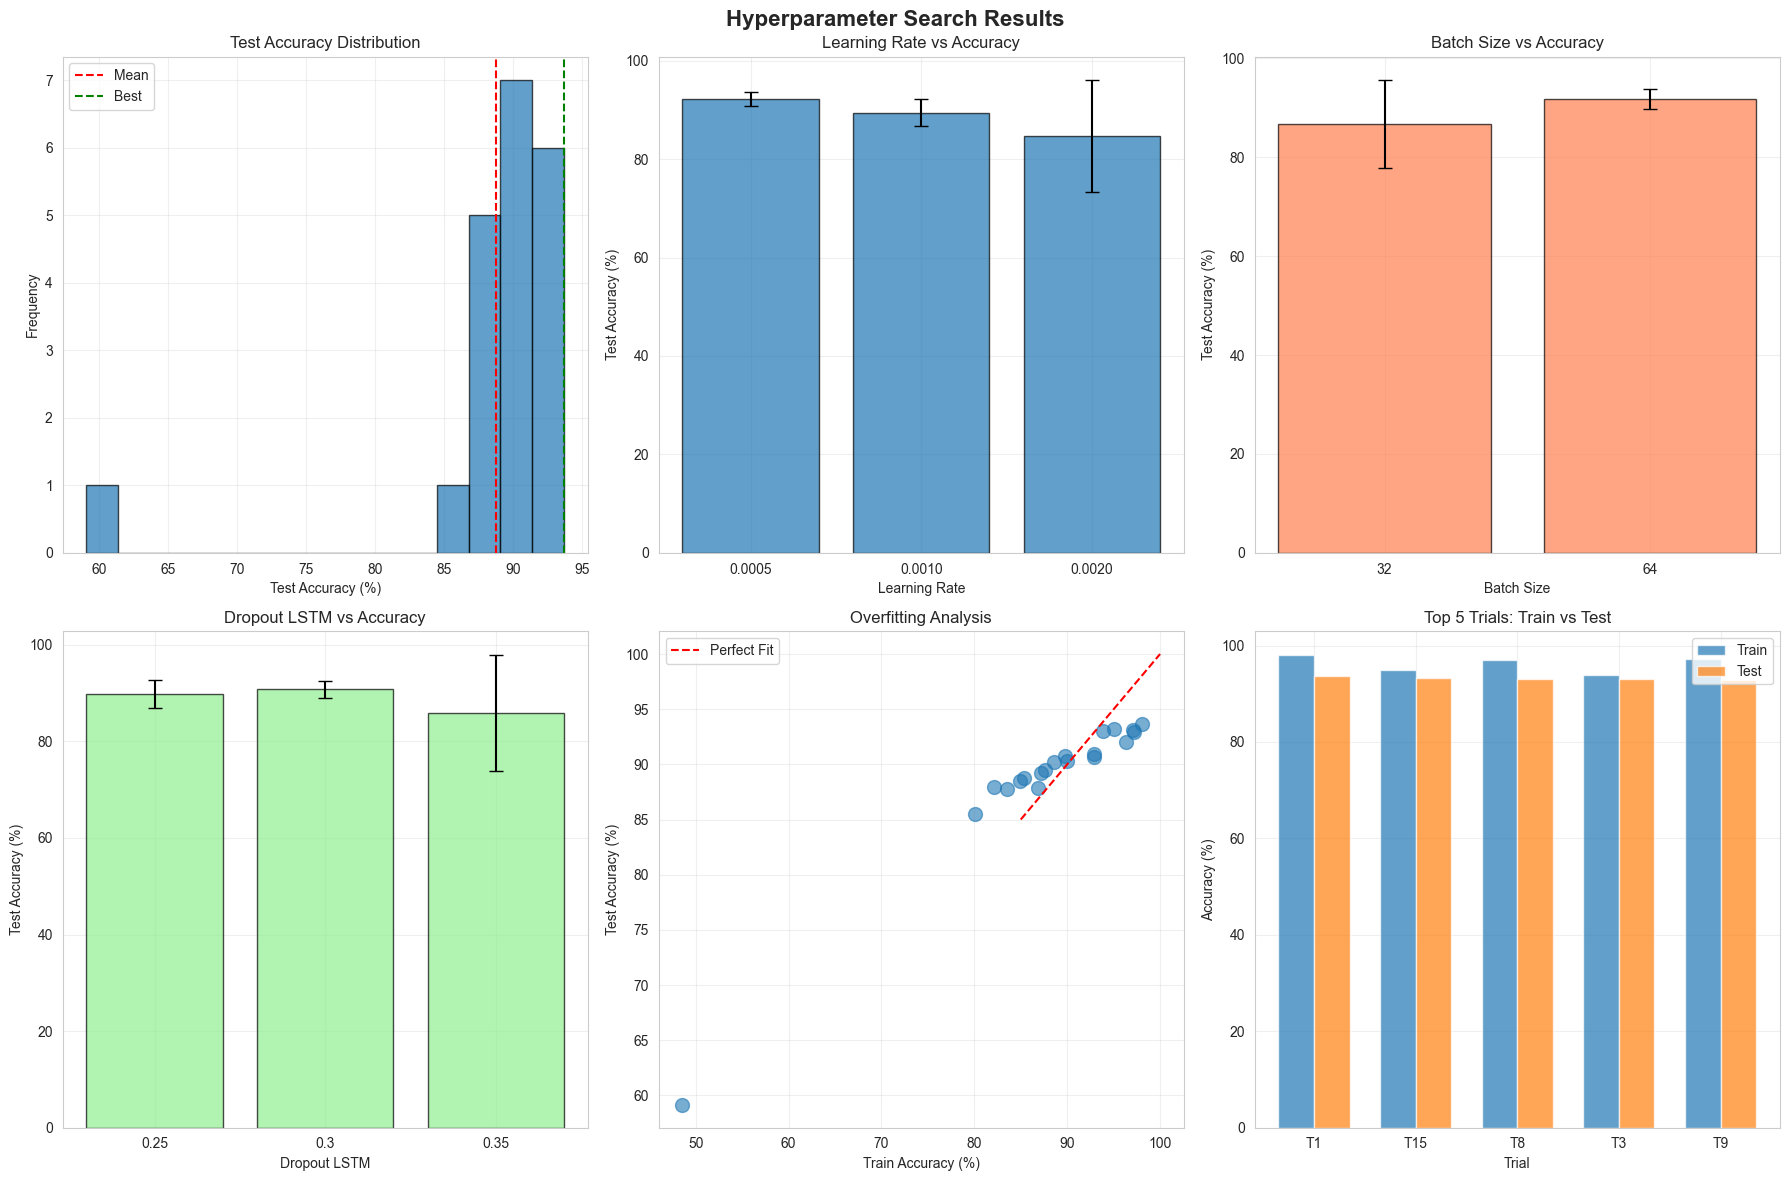

✓ Visualization saved to 'hyperparameter_search_results.png'


In [22]:
# Cell 22: Visualize Hyperparameter Search Results

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Hyperparameter Search Results', fontsize=16, fontweight='bold')

# 1. Test Accuracy Distribution
ax = axes[0, 0]
ax.hist(results_df['Test_Acc'], bins=15, edgecolor='black', alpha=0.7)
ax.axvline(results_df['Test_Acc'].mean(), color='red', linestyle='--', label='Mean')
ax.axvline(results_df['Test_Acc'].max(), color='green', linestyle='--', label='Best')
ax.set_xlabel('Test Accuracy (%)')
ax.set_ylabel('Frequency')
ax.set_title('Test Accuracy Distribution')
ax.legend()
ax.grid(alpha=0.3)

# 2. Learning Rate vs Accuracy
ax = axes[0, 1]
lr_groups = results_df.groupby('LR')['Test_Acc'].agg(['mean', 'std'])
ax.bar(range(len(lr_groups)), lr_groups['mean'], yerr=lr_groups['std'], 
       capsize=5, alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(lr_groups)))
ax.set_xticklabels([f'{lr:.4f}' for lr in lr_groups.index])
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Learning Rate vs Accuracy')
ax.grid(alpha=0.3)

# 3. Batch Size vs Accuracy
ax = axes[0, 2]
bs_groups = results_df.groupby('Batch')['Test_Acc'].agg(['mean', 'std'])
ax.bar(range(len(bs_groups)), bs_groups['mean'], yerr=bs_groups['std'],
       capsize=5, alpha=0.7, edgecolor='black', color='coral')
ax.set_xticks(range(len(bs_groups)))
ax.set_xticklabels(bs_groups.index)
ax.set_xlabel('Batch Size')
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Batch Size vs Accuracy')
ax.grid(alpha=0.3)

# 4. Dropout LSTM vs Accuracy
ax = axes[1, 0]
d_lstm_groups = results_df.groupby('D_LSTM')['Test_Acc'].agg(['mean', 'std'])
ax.bar(range(len(d_lstm_groups)), d_lstm_groups['mean'], yerr=d_lstm_groups['std'],
       capsize=5, alpha=0.7, edgecolor='black', color='lightgreen')
ax.set_xticks(range(len(d_lstm_groups)))
ax.set_xticklabels(d_lstm_groups.index)
ax.set_xlabel('Dropout LSTM')
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Dropout LSTM vs Accuracy')
ax.grid(alpha=0.3)

# 5. Overfitting Analysis
ax = axes[1, 1]
ax.scatter(results_df['Train_Acc'], results_df['Test_Acc'], alpha=0.6, s=100)
ax.plot([85, 100], [85, 100], 'r--', label='Perfect Fit')
ax.set_xlabel('Train Accuracy (%)')
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Overfitting Analysis')
ax.legend()
ax.grid(alpha=0.3)

# 6. Top 5 Trials Comparison
ax = axes[1, 2]
top5 = results_df.head(5)
x = range(len(top5))
width = 0.35
ax.bar([i - width/2 for i in x], top5['Train_Acc'], width, label='Train', alpha=0.7)
ax.bar([i + width/2 for i in x], top5['Test_Acc'], width, label='Test', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels([f"T{t}" for t in top5['Trial']])
ax.set_xlabel('Trial')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Top 5 Trials: Train vs Test')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('hyperparameter_search_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to 'hyperparameter_search_results.png'")

In [26]:
# Cell 23: Train and Save Final Model with Best Hyperparameters (Self-Contained)

print("\n" + "="*70)
print("TRAINING AND SAVING FINAL MODEL WITH BEST HYPERPARAMETERS")
print("="*70)

# Get best configuration
best_trial_id = int(results_df.iloc[0]['Trial'])
best_result = all_results[best_trial_id - 1]
best_config = best_result['config']

print(f"\nBest Configuration (Test Acc: {best_result['best_test_acc']:.2f}%):")
for key in ['learning_rate', 'batch_size', 'dropout_lstm', 'dropout_fc', 
            'lstm1_hidden_dim', 'weight_decay']:
    print(f"  {key}: {best_config[key]}")

# ============================================================================
# Train final model directly here
# ============================================================================

print("\nTraining final model with best hyperparameters...")
start_time = time.time()

# Create data loaders
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=best_config['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_config['batch_size'], shuffle=False)

# Create model
final_model = ConfigurableBiLSTMAttentionModel(best_config, input_dim=input_dim).to(device)
total_params = sum(p.numel() for p in final_model.parameters())

# Setup optimizer
if best_config['optimizer'] == 'Adam':
    optimizer = optim.Adam(
        final_model.parameters(), 
        lr=best_config['learning_rate'],
        weight_decay=best_config['weight_decay']
    )
elif best_config['optimizer'] == 'AdamW':
    optimizer = optim.AdamW(
        final_model.parameters(), 
        lr=best_config['learning_rate'],
        weight_decay=best_config['weight_decay']
    )

criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='max', 
    patience=best_config['scheduler_patience'],
    factor=best_config['scheduler_factor']
)

# Training loop
history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}
best_test_acc = 0.0
best_epoch = 0
patience_counter = 0
best_model_state = None

for epoch in range(best_config['max_epochs']):
    # Train
    final_model.train()
    train_loss, train_correct, train_total = 0.0, 0, 0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = final_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == batch_y).sum().item()
        train_total += batch_y.size(0)
    
    train_loss /= len(train_loader)
    train_acc = 100 * train_correct / train_total
    
    # Evaluate
    final_model.eval()
    test_loss, test_correct, test_total = 0.0, 0, 0
    
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = final_model(batch_X)
            loss = criterion(outputs, batch_y)
            
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == batch_y).sum().item()
            test_total += batch_y.size(0)
    
    test_loss /= len(test_loader)
    test_acc = 100 * test_correct / test_total
    
    # Save history
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)
    
    # Scheduler
    scheduler.step(test_acc)
    
    # Check improvement
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_epoch = epoch + 1
        patience_counter = 0
        best_model_state = final_model.state_dict().copy()
    else:
        patience_counter += 1
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"  Epoch {epoch+1:3d}: Train={train_acc:.2f}%, Test={test_acc:.2f}% | Best={best_test_acc:.2f}%")
    
    # Early stopping
    if patience_counter >= best_config['early_stop_patience']:
        print(f"  Early stopping at epoch {epoch+1}")
        break

# Load best weights
if best_model_state is not None:
    final_model.load_state_dict(best_model_state)

training_time = time.time() - start_time

print("\n✓ Final model training complete!")
print(f"  Best Test Accuracy: {best_test_acc:.2f}% (Epoch {best_epoch})")
print(f"  Training Time: {training_time:.1f}s")

# ============================================================================
# Save the trained model
# ============================================================================

print("\nSaving best trained model...")
import pickle

model_package = {
    'model_state_dict': final_model.state_dict(),  # TRAINED weights
    'model_class': 'ConfigurableBiLSTMAttentionModel',
    'config': best_config,
    'input_dim': input_dim,
    'num_classes': 10,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'feature_columns': df.drop('label', axis=1).columns.tolist(),
    'test_accuracy': best_test_acc,
    'history': history
}

with open('pytorch_genre_classifier_best.pkl', 'wb') as f:
    pickle.dump(model_package, f)

torch.save(final_model.state_dict(), 'best_model_weights.pth')

print("✓ Best model saved to 'pytorch_genre_classifier_best.pkl'")
print("✓ Best model weights saved to 'best_model_weights.pth'")

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"Best Test Accuracy: {best_test_acc:.2f}%")
print(f"Model: ConfigurableBiLSTMAttentionModel")
print(f"Total Parameters: {total_params:,}")
print(f"Best Epoch: {best_epoch}")
print(f"Training Time: {training_time:.1f}s")
print("="*70)


TRAINING AND SAVING FINAL MODEL WITH BEST HYPERPARAMETERS

Best Configuration (Test Acc: 93.69%):
  learning_rate: 0.0005
  batch_size: 64
  dropout_lstm: 0.25
  dropout_fc: 0.35
  lstm1_hidden_dim: 256
  weight_decay: 0.01

Training final model with best hyperparameters...
  Epoch  10: Train=80.58%, Test=83.68% | Best=83.68%
  Epoch  20: Train=86.46%, Test=85.94% | Best=87.09%
  Epoch  30: Train=88.58%, Test=89.04% | Best=89.04%
  Epoch  40: Train=90.12%, Test=89.89% | Best=90.19%
  Epoch  50: Train=94.58%, Test=91.24% | Best=91.34%
  Epoch  60: Train=95.71%, Test=92.54% | Best=92.54%
  Epoch  70: Train=96.61%, Test=93.09% | Best=93.59%
  Epoch  80: Train=97.90%, Test=93.24% | Best=93.99%
  Early stopping at epoch 88

✓ Final model training complete!
  Best Test Accuracy: 93.99% (Epoch 78)
  Training Time: 72.6s

Saving best trained model...
✓ Best model saved to 'pytorch_genre_classifier_best.pkl'
✓ Best model weights saved to 'best_model_weights.pth'

FINAL SUMMARY
Best Test Accura

In [14]:
#!pip install pandas
import pandas as pd

# Load the training data

# Check the length column
print("Length column statistics:")
print(df['length'].describe())
print("\nFirst 20 length values:")
print(df['length'].head(20))
print("\nUnique length values:")
print(df['length'].nunique())

Length column statistics:
count     9990.0
mean     66149.0
std          0.0
min      66149.0
25%      66149.0
50%      66149.0
75%      66149.0
max      66149.0
Name: length, dtype: float64

First 20 length values:
0     66149
1     66149
2     66149
3     66149
4     66149
5     66149
6     66149
7     66149
8     66149
9     66149
10    66149
11    66149
12    66149
13    66149
14    66149
15    66149
16    66149
17    66149
18    66149
19    66149
Name: length, dtype: int64

Unique length values:
1
